In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from tabulate import tabulate
import pandas as pd

<font size = 4> Функции, необходимые для вычисления <font>

In [2]:
def BuildD(dm1, dm2, nj, njx, mode, h1, h2):
    fl = True
    tmp = 0
    res = 0
    a = -dm2
    dm = np.zeros((nj, 2))
    for i in range(nj):
        if (i % njx == 0):
            if (mode == "m"):
                fl = not fl
            a += dm2
            tmp = -1
        tmp += 1
        if ((fl) and (mode == "m")):
            dm[i, 0] = dm1 / 2 + tmp * dm1
            dm[i, 1] += a
        else:
            if (mode == "1"):
                dm[i, 0] = dm1 * tmp + h1
                dm[i, 1] = a + h2
            else:
                dm[i, 0] = dm1 * tmp
                dm[i, 1] = a
    return dm

def maxi(dm, j):
    max = 0
    for i in range (len(dm)):
        if (dm[i, j] > max):
            max = dm[i, j]
    return max

def calculate_dx(ne, nj, dm, dn2):
    x = 0
    n = 0
    dx = np.zeros(ne * nj)
    for n in range(ne):
        for k in range(nj):
            dx[x] = dm[k, 0] + dn2[n, 0]
            x += 1
    return dx

def calculate_dy(ne, nj, dm, dn2):
    y = 0
    n = 0
    dy = np.zeros(ne * nj)
    for n in range(ne):
        for k in range(nj):
            dy[y] = dm[k, 1] + dn2[n, 1]
            y += 1
    return dy

def calculate_d(dx, dy, n):
    d = np.zeros((n, 2))
    for i in range(n):
        d[i,0] = dx[i]
        d[i,1] = dy[i]
    return d    

def AM(theta, ksi, Theta):
    k = (2.78 * theta/Theta) ** 2 + (2.78 * ksi/Theta) ** 2
    return np.sin(np.sqrt(k))/np.sqrt(k) if k != 0 else 1

def AR(n, d, azim, ygo, theta, ksi, lambd):
    x = 0
    k = 2 * np.pi/lambd
    for i in range(n):
        x += np.exp(-1j * ( k * ( d[i, 0] * 10**(-2) * ( np.sin(np.radians(theta)) - np.sin(np.radians(azim))) + d[i,1] * 10**(-2) * (np.sin(np.radians(ksi)) - np.sin(np.radians(ygo))))))
    return x

def DPRL(n, d, azim, ygo, theta, ksi, lambd):
    ar = AR(n, d, azim, ygo, theta, ksi, lambd)
    return 10*np.log10(ar*np.conjugate(ar)/(n**2))

<font size = 4>
<p> Начальные значения </p>
<p> $\lambda = 0.25$ - длина волны </p>
$\lambda/2 = 0.125$ <font>

In [3]:
lam = 0.25
lam2 = lam/2
G = 30
A = (10**(0.1* G) * lam**2)/ (4 * np.pi)
print(A/lam2)

39.78873577297384


In [4]:
print(A/(lam2**2))

318.3098861837907


In [5]:
jx = 4
jy = 4
nj = jx * jy
value_list = [[jx, jy, nj]]
column_list = ["Количество элементов в строке", "Количество элементов в столбце", "Количество элементов в излучателе"]
print("\n", "Вычисление координат излучателей в модуле")
print(tabulate(value_list, column_list, tablefmt="grid"))


 Вычисление координат излучателей в модуле
+---------------------------------+----------------------------------+-------------------------------------+
|   Количество элементов в строке |   Количество элементов в столбце |   Количество элементов в излучателе |
+=================================+==================================+=====================================+
|                               4 |                                4 |                                  16 |
+---------------------------------+----------------------------------+-------------------------------------+


In [6]:
nx = 8
ny = 5
ne = nx * ny
value_list = [[nx, ny, ne]]
column_list = ["Количество элементов в строке", "Количество элементов в столбце", "Количество элементов в полотне антенны"]
print("\n", "Вычисление координат модулей")
print(tabulate(value_list, column_list, tablefmt="grid"))


 Вычисление координат модулей
+---------------------------------+----------------------------------+------------------------------------------+
|   Количество элементов в строке |   Количество элементов в столбце |   Количество элементов в полотне антенны |
+=================================+==================================+==========================================+
|                               8 |                                5 |                                       40 |
+---------------------------------+----------------------------------+------------------------------------------+


In [7]:
dm1 = 15 #расстояние между элементами в строке
dm2 = 13 #расстояние между элементами в столбце
d1 = dm1 * jx
d2 = dm2 * jy

In [8]:
dm = BuildD(dm1, dm2, nj, jx, "m", 0, 0)
h1 = (maxi(dm, 0)) / 2
h2 = (maxi(dm, 1)) / 2
dn1 = BuildD(d1, d2, ne, nx, "1", h1, h2)
dn2 = BuildD(d1, d2, ne, nx, "2", 0, 0)

In [9]:
dfm = pd.DataFrame({
     '1': dm[:,0],
     '2': dm[:,1]
})

dfn1 = pd.DataFrame({
     '1': dn1[:,0],
     '2': dn1[:,1]
})

dfn2 = pd.DataFrame({
     '1': dn2[:,0],
     '2': dn2[:,1]
})

In [10]:
print("Координаты гексоганально расположенных элем. в модуле", "\n", dfm)

Координаты гексоганально расположенных элем. в модуле 
        1     2
0    0.0   0.0
1   15.0   0.0
2   30.0   0.0
3   45.0   0.0
4    7.5  13.0
5   22.5  13.0
6   37.5  13.0
7   52.5  13.0
8    0.0  26.0
9   15.0  26.0
10  30.0  26.0
11  45.0  26.0
12   7.5  39.0
13  22.5  39.0
14  37.5  39.0
15  52.5  39.0


In [11]:
print("Смещённые в 0 центра подрешёток", "\n", dfn2)

Смещённые в 0 центра подрешёток 
         1      2
0     0.0    0.0
1    60.0    0.0
2   120.0    0.0
3   180.0    0.0
4   240.0    0.0
5   300.0    0.0
6   360.0    0.0
7   420.0    0.0
8     0.0   52.0
9    60.0   52.0
10  120.0   52.0
11  180.0   52.0
12  240.0   52.0
13  300.0   52.0
14  360.0   52.0
15  420.0   52.0
16    0.0  104.0
17   60.0  104.0
18  120.0  104.0
19  180.0  104.0
20  240.0  104.0
21  300.0  104.0
22  360.0  104.0
23  420.0  104.0
24    0.0  156.0
25   60.0  156.0
26  120.0  156.0
27  180.0  156.0
28  240.0  156.0
29  300.0  156.0
30  360.0  156.0
31  420.0  156.0
32    0.0  208.0
33   60.0  208.0
34  120.0  208.0
35  180.0  208.0
36  240.0  208.0
37  300.0  208.0
38  360.0  208.0
39  420.0  208.0


In [12]:
print("Истинные центра подрешёток", "\n", dfn1)

Истинные центра подрешёток 
          1      2
0    26.25   19.5
1    86.25   19.5
2   146.25   19.5
3   206.25   19.5
4   266.25   19.5
5   326.25   19.5
6   386.25   19.5
7   446.25   19.5
8    26.25   71.5
9    86.25   71.5
10  146.25   71.5
11  206.25   71.5
12  266.25   71.5
13  326.25   71.5
14  386.25   71.5
15  446.25   71.5
16   26.25  123.5
17   86.25  123.5
18  146.25  123.5
19  206.25  123.5
20  266.25  123.5
21  326.25  123.5
22  386.25  123.5
23  446.25  123.5
24   26.25  175.5
25   86.25  175.5
26  146.25  175.5
27  206.25  175.5
28  266.25  175.5
29  326.25  175.5
30  386.25  175.5
31  446.25  175.5
32   26.25  227.5
33   86.25  227.5
34  146.25  227.5
35  206.25  227.5
36  266.25  227.5
37  326.25  227.5
38  386.25  227.5
39  446.25  227.5


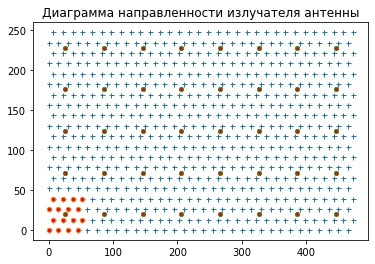

In [13]:
n = ne * nj
dx = calculate_dx(ne, nj, dm, dn2)
dy = calculate_dy(ne, nj, dm, dn2)
d = calculate_d(dx,dy,n)
max1 = math.ceil(dx.max())
max2 = math.ceil(dy.max())
maximum = max(max1, max2)
x = np.linspace(0, maximum, 1000)
plt.plot(dx, dy, linestyle='',marker='+',markersize=5, markerfacecolor='#FF0000')
plt.plot(dm[:, 0], dm[:, 1], linestyle='', marker='8', markersize=5, markerfacecolor='#FF0000')
plt.plot(dn1[:, 0], dn1[:, 1], linestyle='', marker='8', markersize=5, markerfacecolor='#FF0000')
plt.title("Диаграмма направленности излучателя антенны")
plt.show()

In [14]:
df = pd.DataFrame({
     '1': d[:,0],
     '2': d[:,1]
})

In [15]:
print("Формирование ФАР с", n, "гексогонально расположенными излучателями" "\n", df)

Формирование ФАР с 640 гексогонально расположенными излучателями
          1      2
0      0.0    0.0
1     15.0    0.0
2     30.0    0.0
3     45.0    0.0
4      7.5   13.0
..     ...    ...
635  465.0  234.0
636  427.5  247.0
637  442.5  247.0
638  457.5  247.0
639  472.5  247.0

[640 rows x 2 columns]


In [16]:
theta = np.linspace(-90, 90, 3600)
ksi = np.linspace(-90, 90, 3600)
etta = 90
AM = np.vectorize(AM, excluded=['Theta', 'theta', 'ksi'])
azim = 20
ygo = 12

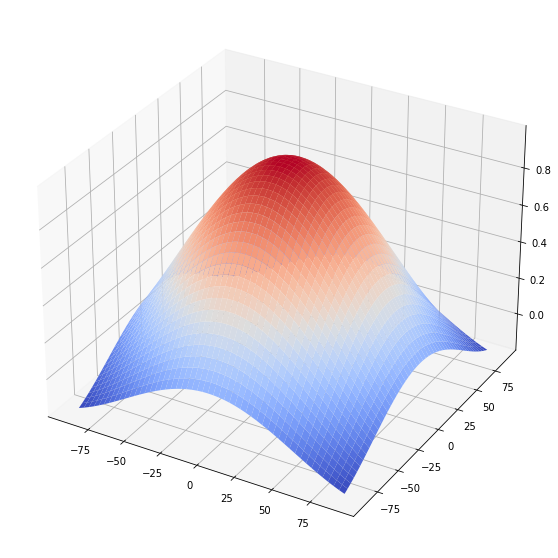

In [17]:
X = theta
Y = ksi
X, Y = np.meshgrid(X, Y)
Z = AM(X, Y, etta)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
#ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1)
ax.plot_surface(X, Y, Z, cmap = cm.coolwarm, antialiased = "False")
plt.show()

<font size = 4> Расчёт DPRL($\theta$, $\ksi$) <font>

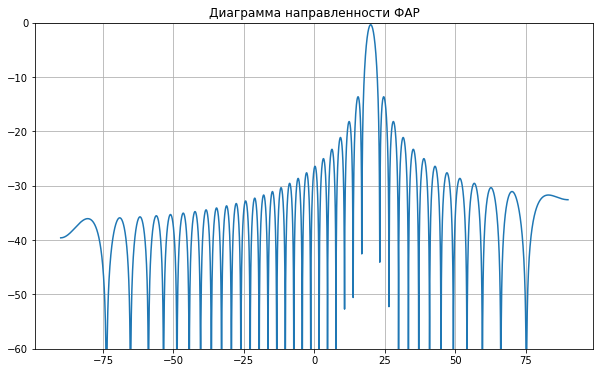

In [18]:
def AR(n, d, azim, ygo, theta, ksi, lambd):
    x = 0
    k = 2 * np.pi/lambd
    for i in range(n):
        x += np.exp(-1j * ( k * ( d[i, 0] * 10**(-2) * ( np.sin(np.radians(theta)) - np.sin(np.radians(azim))) + d[i,1] * 10**(-2) * (np.sin(np.radians(ksi)) - np.sin(np.radians(ygo))))))
    return x

def DPRL(n, d, azim, ygo, theta, ksi, lambd):
    ar = AR(n, d, azim, ygo, theta, ksi, lambd)
    am = AM(azim, ygo, 90)
    return 10*np.log10(am * ar*np.conjugate(ar)/(n**2))

dp = DPRL(n, d, azim, ygo, theta, ygo, lam).real
plt.figure(figsize=(5*2, 3*2))
plt.ylim(-60, 0)
plt.grid(True)
plt.title("Диаграмма направленности ФАР")
plt.plot(theta, dp)

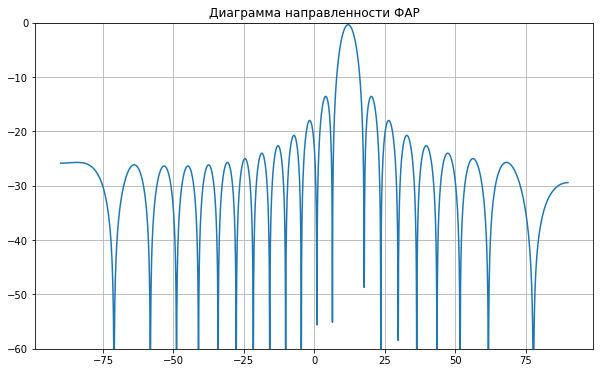

In [19]:
dp = DPRL(n, d, azim, ygo, azim, ksi, lam).real
plt.figure(figsize=(5*2, 3*2))
plt.ylim(-60, 0)
plt.grid(True)
plt.title("Диаграмма направленности ФАР")
plt.plot(theta, dp)

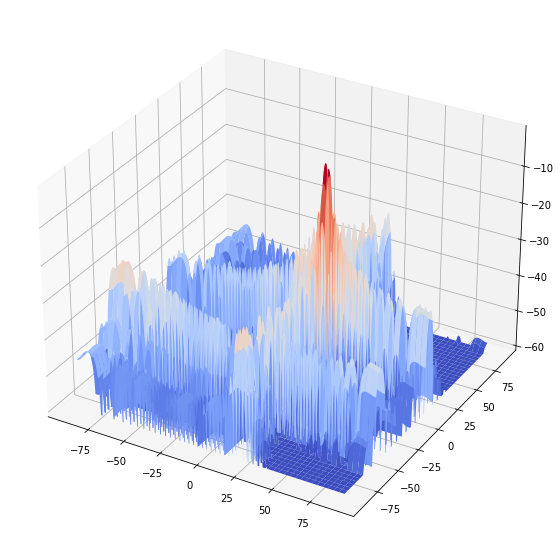

In [20]:
fig = plt.figure(figsize=(10, 10))
X, Y = np.meshgrid(theta, ksi)
Z = DPRL(n, d, azim, ygo, X, Y, lam).real
ax = fig.add_subplot(111, projection='3d')
Z[Z < -60] = -60
ax.plot_surface(X, Y, Z, cmap = cm.coolwarm, antialiased = "False")
plt.show()